# 12 Implementing a Multilayer Artificial Neural Network from Scratch
---

*Overview*

- [12.1 Modeling complex functions with artificial neural networks](#12.1-Modeling-complex-functions-with-artificial-neural-networks)
    - [12.1.1 Single-layer neural network recap](#12.1.1-Single-layer-neural-network-recap)
    - [12.1.2 Introducing the multi-layer neural network architecture](#12.1.2-Introducing-the-multi-layer-neural-network-architecture)
    - [12.1.3 Activating a neural network via forward propagation](#12.1.3-Activating-a-neural-network-via-forward-propagation)

---

In [1]:
# import
import numpy as np
import scipy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import IPython
import sklearn
import nltk

from IPython.display import Image
%matplotlib inline

import datetime
dt = datetime.datetime.now()

print('%s-%s-%s %s:%s:%s\n----------------------\n' 'numpy\t\t%s\n' 'scipy\t\t%s\n' 'pandas\t\t%s\n' 'matplotlib\t%s\n' '----------------------\n' 'ipython\t\t%s\n' '----------------------\n' 'sklearn\t\t%s\n' 'nltk\t\t%s\n' % 
      (dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, np.__version__, scipy.__version__, pd.__version__, matplotlib.__version__, IPython.__version__, sklearn.__version__, nltk.__version__))

2018-7-4 17:23:34
----------------------
numpy		1.13.3
scipy		0.19.1
pandas		0.22.0
matplotlib	2.1.1
----------------------
ipython		6.1.0
----------------------
sklearn		0.19.1
nltk		3.2.4



## 12.1 Modeling complex functions with artificial neural networks
---

- [McCulloch, Pitts 1940s]()

**McCulloch-Pitts Neuron model**

**Rosenblatt perceptron**

**Backpropagation algo** (誤差逆伝播法)

- [Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1986). Learning representations by back-propagating errors. nature, 323(6088), 533.](https://scholar.google.co.jp/schhp?hl=en&num=20&as_sdt=0)

"[AI winter](https://en.wikipedia.org/wiki/AI_winter)"

e.g., 

- DeepFace: 
    - [Taigman, Y., Yang, M., Ranzato, M. A., & Wolf, L. (2014). Deepface: Closing the gap to human-level performance in face verification. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 1701-1708).](https://www.cv-foundation.org/openaccess/content_cvpr_2014/papers/Taigman_DeepFace_Closing_the_2014_CVPR_paper.pdf)
- DeepSpeech: 
    - [Hannun, A., Case, C., Casper, J., Catanzaro, B., Diamos, G., Elsen, E., ... & Ng, A. Y. (2014). Deep speech: Scaling up end-to-end speech recognition. arXiv preprint arXiv:1412.5567.](https://arxiv.org/pdf/1412.5567.pdf) 
    - [Amodei, D., Ananthanarayanan, S., Anubhai, R., Bai, J., Battenberg, E., Case, C., ... & Chen, J. (2016, June). Deep speech 2: End-to-end speech recognition in english and mandarin. In International Conference on Machine Learning (pp. 173-182).](http://proceedings.mlr.press/v48/amodei16.html)
- Google's Neural Machine Translation System: 
    - [Wu, Y., Schuster, M., Chen, Z., Le, Q. V., Norouzi, M., Macherey, W., ... & Klingner, J. (2016). Google's neural machine translation system: Bridging the gap between human and machine translation. arXiv preprint arXiv:1609.08144.](https://arxiv.org/pdf/1609.08144.pdf%20(7.pdf)
- Toxicity prediction: 
    - [Unterthiner, T., Mayr, A., Klambauer, G., & Hochreiter, S. (2015). Toxicity prediction using deep learning. arXiv preprint arXiv:1503.01445.](https://arxiv.org/pdf/1503.01445.pdf)
- Skin cancer classification: 
    - [Esteva, A., Kuprel, B., Novoa, R. A., Ko, J., Swetter, S. M., Blau, H. M., & Thrun, S. (2017). Dermatologist-level classification of skin cancer with deep neural networks. Nature, 542(7639), 115.](http://on-demand.gputechconf.com/gtc/2017/presentation/s7822-andre-esteva-dermatologiest-level-classification-of-skin-cancer.pdf)

### 12.1.1 Single-layer neural network recap
---

**ADALINE** (ADAptive LInear NEuron)

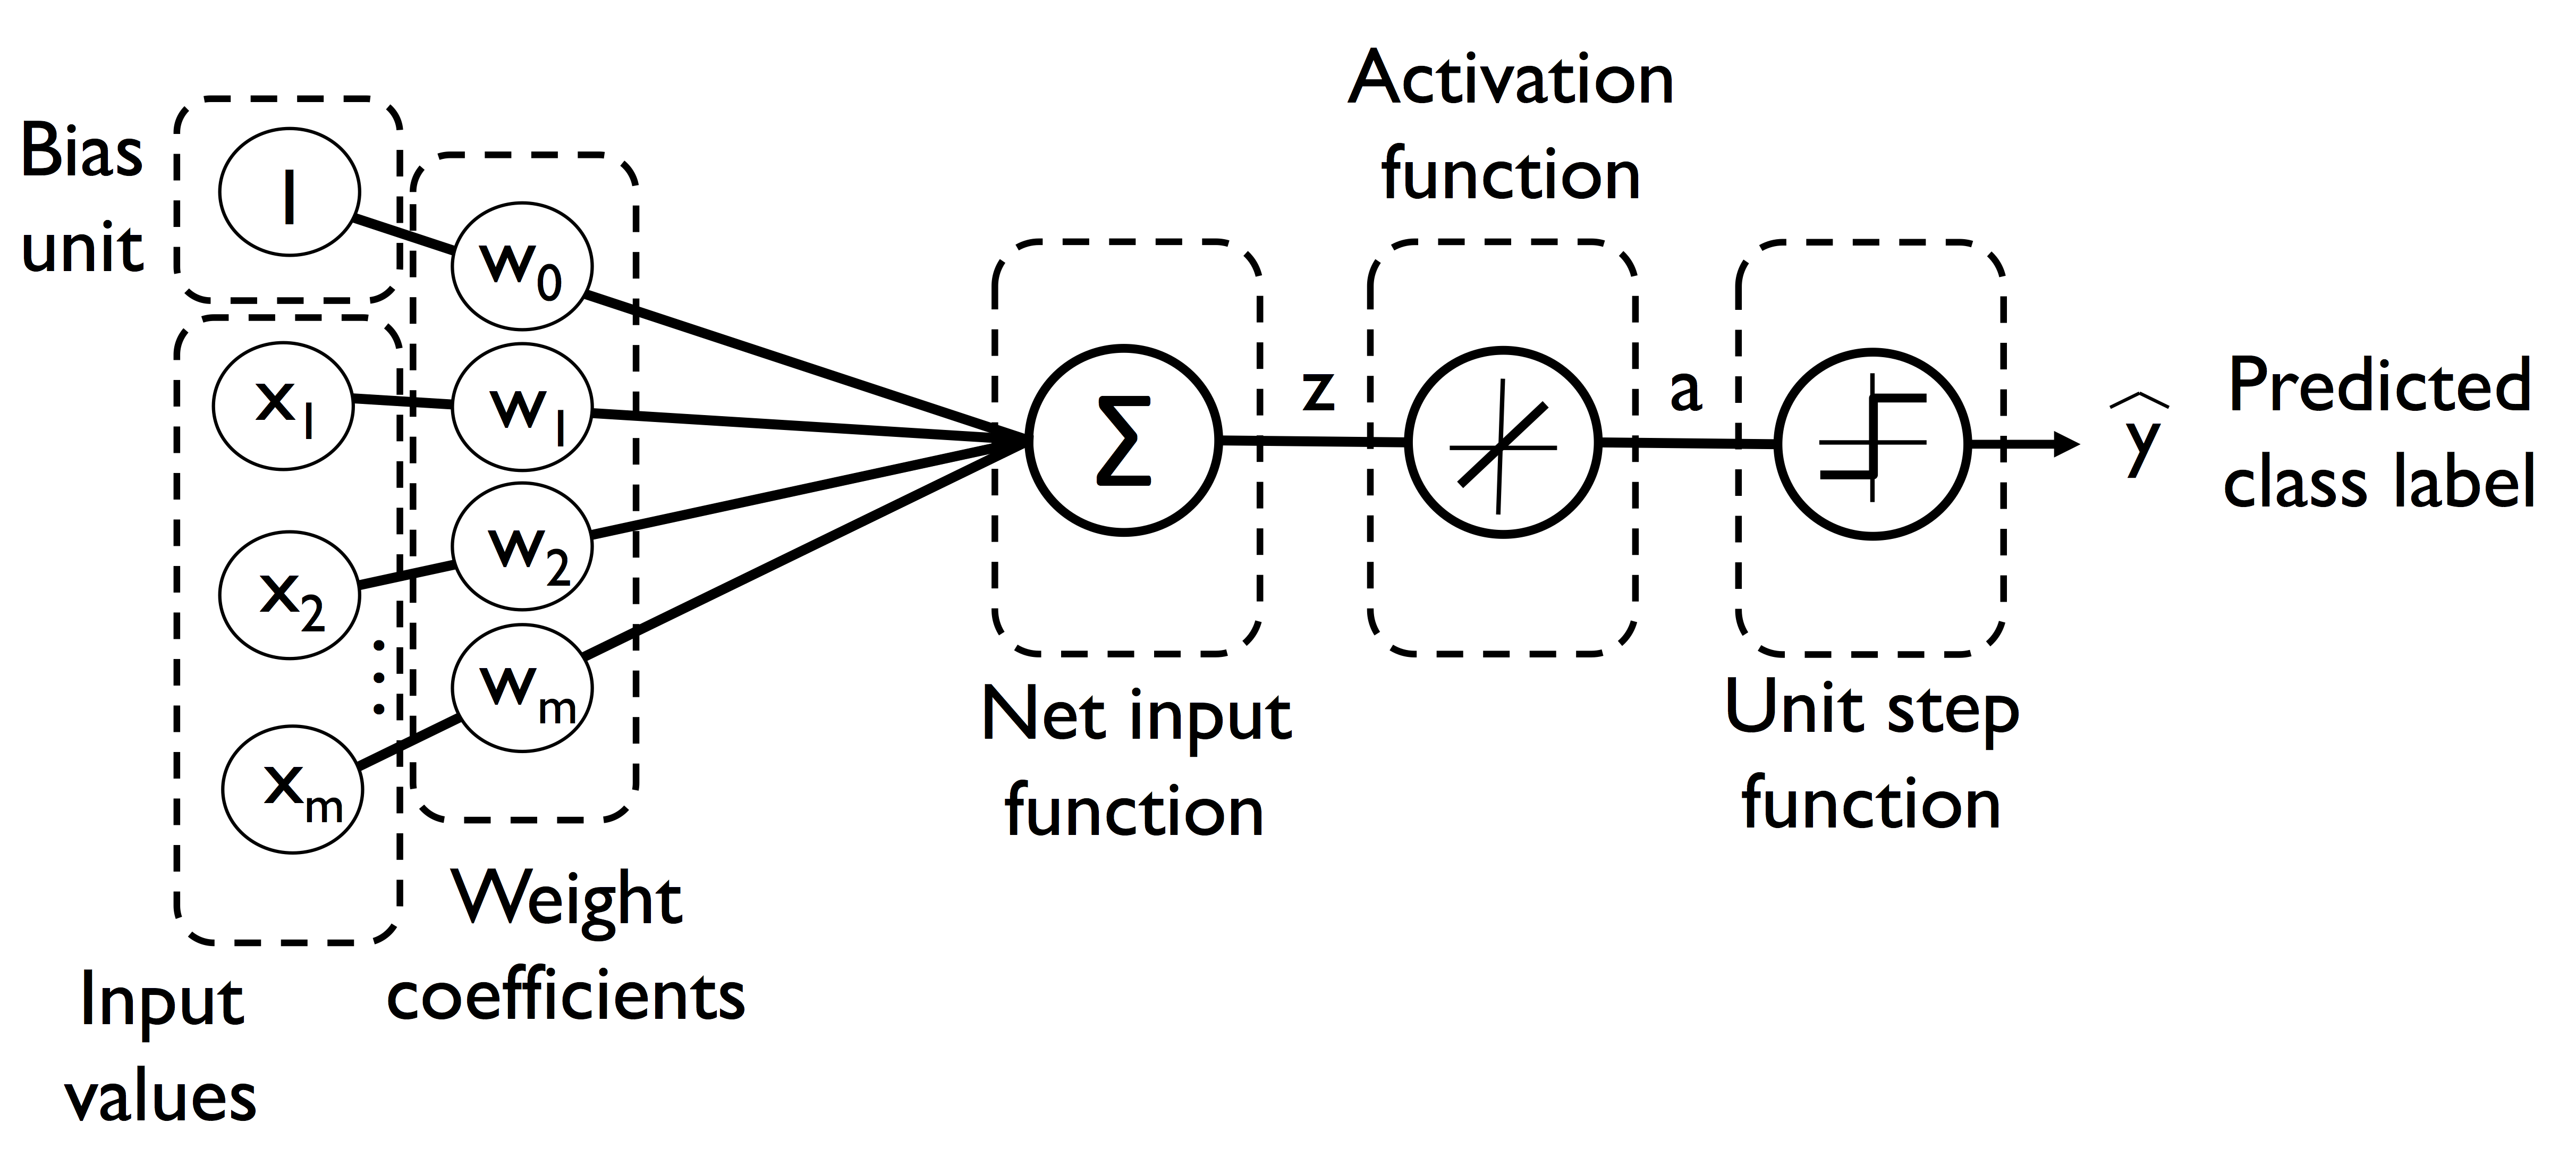

In [2]:
Image('img/12_01.png', width=500)

**epoch**

$$\begin{align*}
w &:= w + \Delta w, & \Delta w &= - \eta\nabla J(w)
& \quad\quad (12.1.1)
\end{align*}$$




### 12.1.2 Introducing the multi-layer neural network architecture
---

**Multilayer feedforward neural network**
, aka **MultiLayer Perceptron** (MLP)


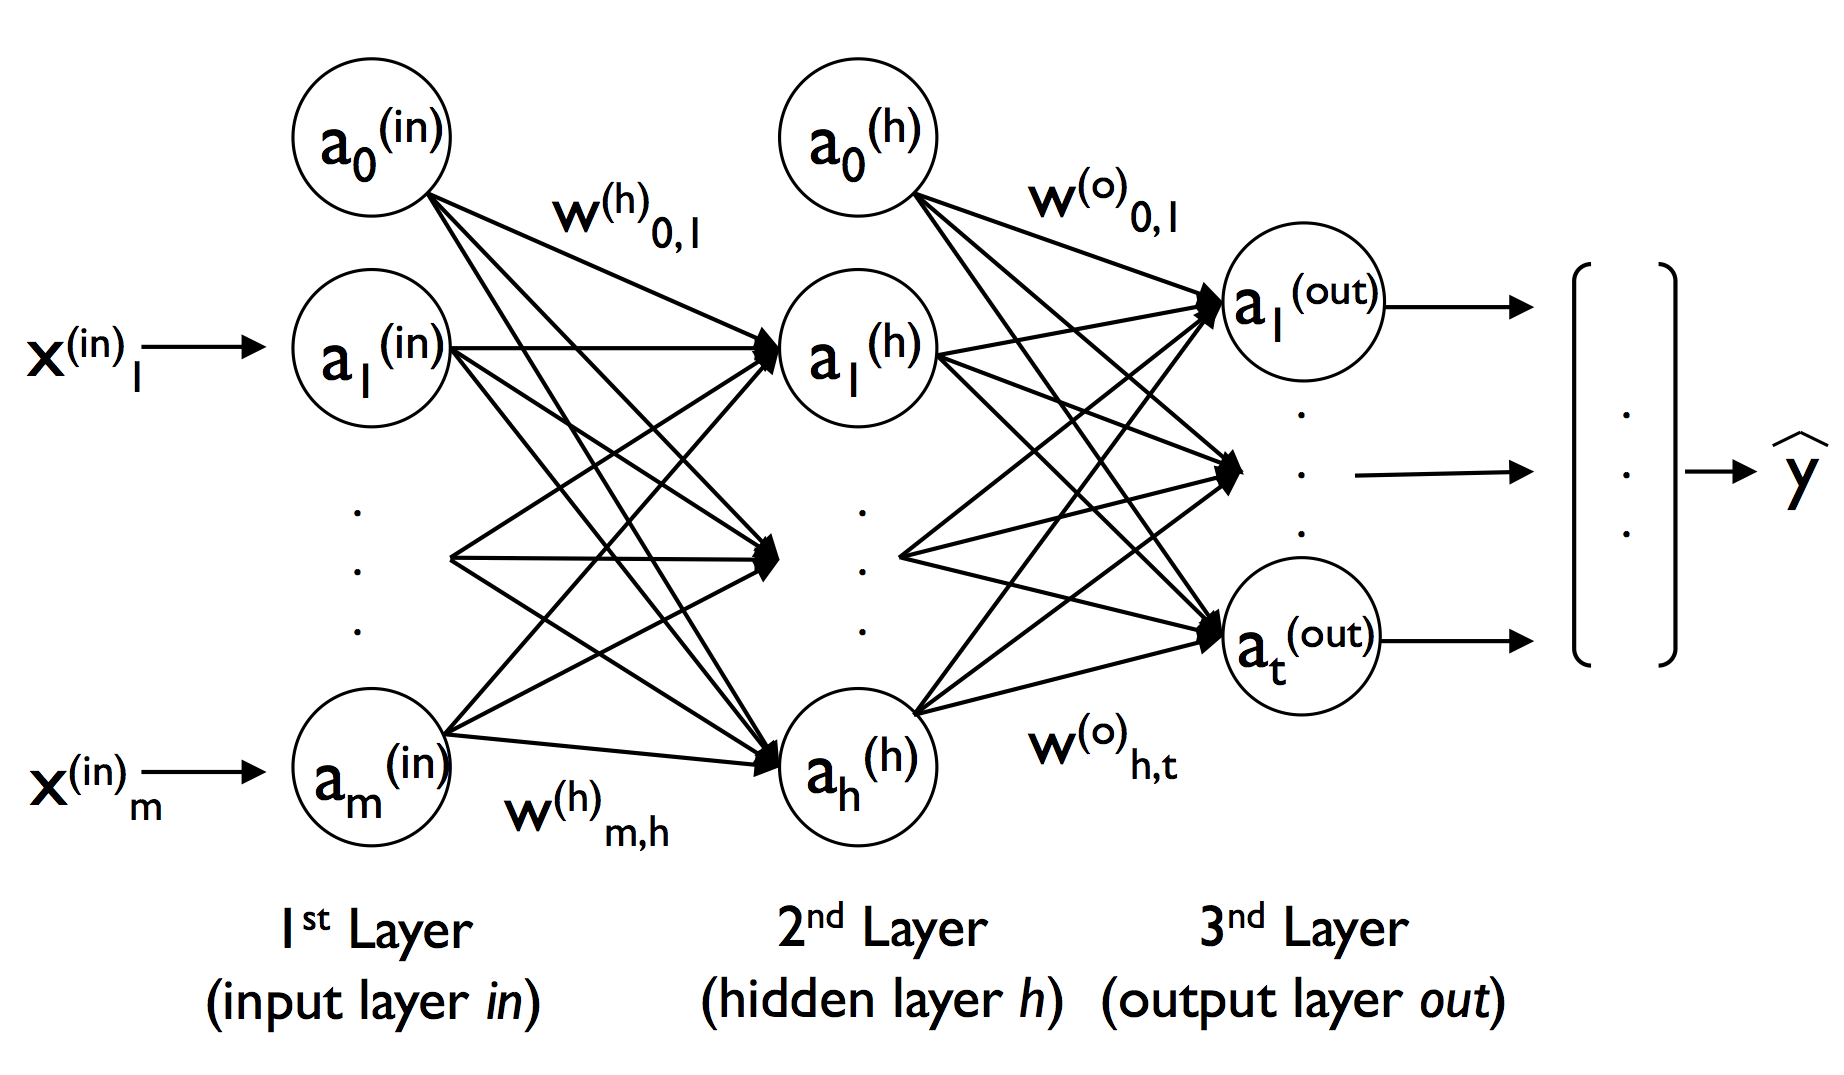

In [3]:
Image('img/12_02.png', width=500)

- input layer
- **hidden layer**
- outer layer

> ---
> 
> **Deep Learning**
> 
> ---

$$\begin{align*}
\mathbf{a}^{(in)} = \begin{bmatrix}
a^{(in)}_0 \\
a^{(in)}_1 \\
\vdots \\
a^{(in)}_m
\end{bmatrix} = \begin{bmatrix}
1 \\
x^{(in)}_1 \\
\vdots \\
x^{(in)}_m
\end{bmatrix}
& \quad\quad (12.1.6)
\end{align*}$$

> ---
> 
> 
> 
> ---

**one-hot**

$$\begin{align*}
0 = \begin{bmatrix}
1 \\
0 \\
0 
\end{bmatrix}, \quad
1 = \begin{bmatrix}
0 \\
1 \\
0 
\end{bmatrix}, \quad
2 = \begin{bmatrix}
0 \\
0 \\
1 
\end{bmatrix}
& \quad\quad (12.1.7)
\end{align*}$$


$$\begin{align*}
\mathbf{W}^{(h)} \in \mathbb{R}^{m \times d}
& \quad\quad (12.1.8)
\end{align*}$$

- $d$: # of hidden unit +1
- $m$: # of input unit +1


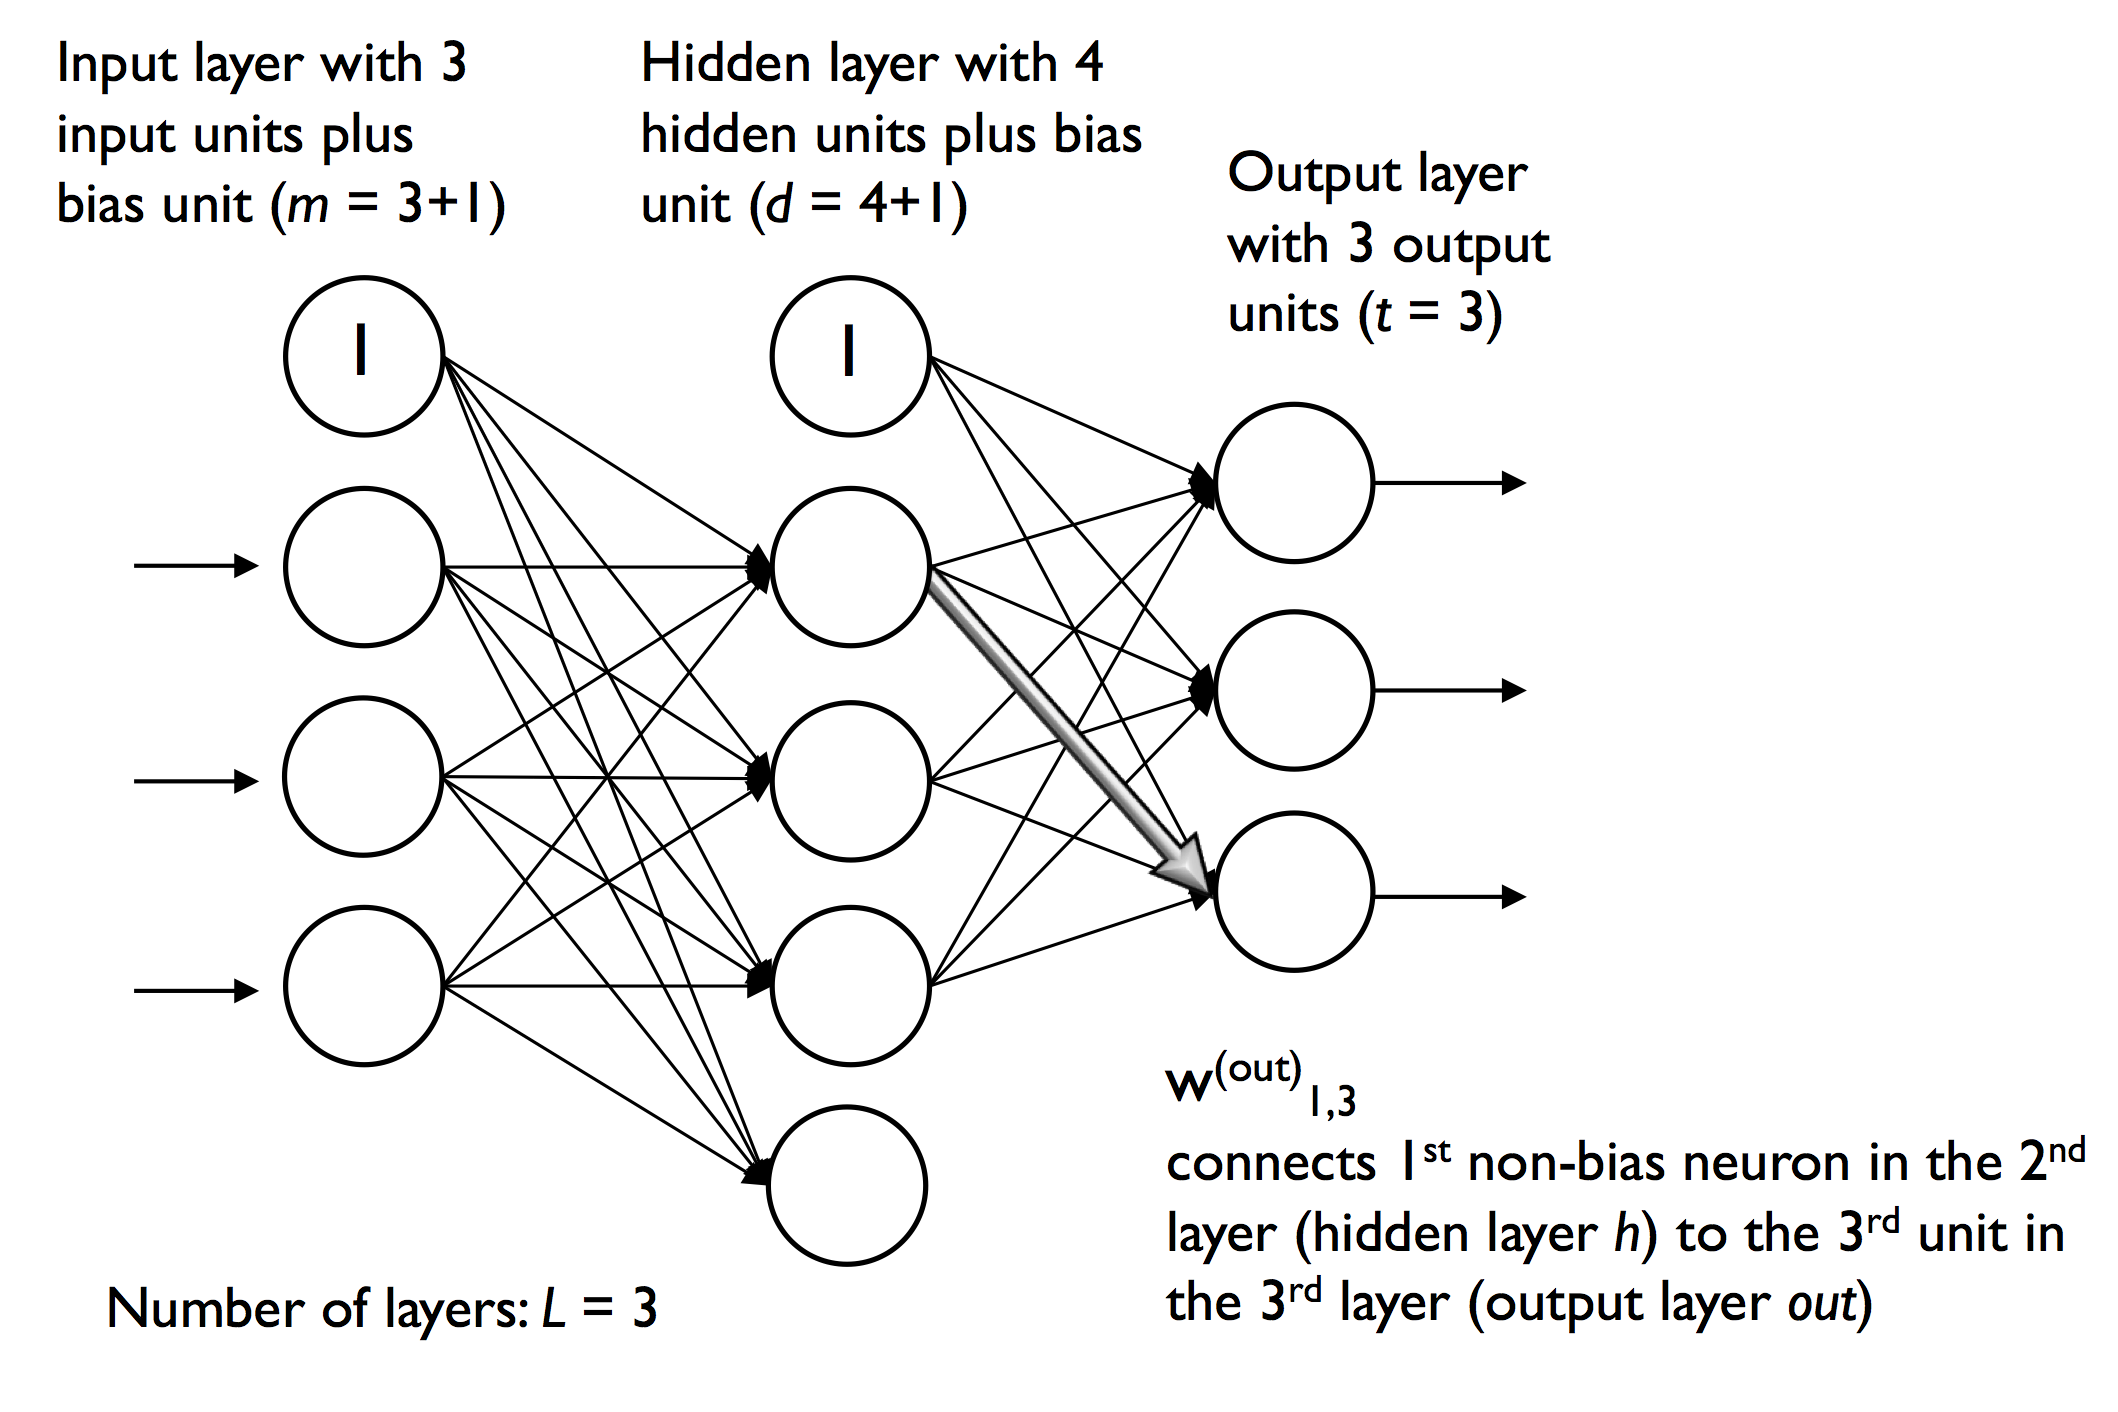

In [4]:
Image('img/12_03.png', width=500)

### 12.1.3 Activating a neural network via forward propagation
---

**Forward propagation**

1. 順方向に伝播
2. cost fn で error を計算
3. error を逆方向に伝播, weight に対する偏導関数を求め, model を更新

$$\begin{align*}
z^{(h)}_1 &= a^{(in)}_0 w^{(h)}_{0, 1} + a^{(in)}_1 w^{(h)}_{1, 1} + \cdots + a^{(in)}_m w^{(h)}_{m, 1} \\
a^{(h)}_1 &= \phi(z_1^{(h)})
& \quad\quad (12.1.9)
\end{align*}$$

- $z^{(h)}_1$: net input
- $\phi()$: activation fn

$$\begin{align*}
\phi(z) = \frac{1}{1+e^{-z}}
& \quad\quad (12.1.10)
\end{align*}$$

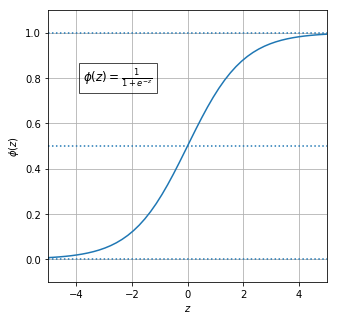

In [25]:
def phi(z):
    return 1/(1 + np.exp(-z))

xmin, xmax, ymin, ymax = -5, 5, -0.1, 1.1
z = np.linspace(xmin, xmax)

fig, axes = plt.subplots(figsize=(5, 5))

axes.plot(z, phi(z))#, c=c[0])
axes.text(xmin+(xmax-xmin)/4, ymin+(ymax-ymin)*3/4, r'$\phi(z) = \frac{1}{1+e^{-z}}$', 
          fontsize=12, ha='center', va='center',
          bbox=dict(fc=(1,1,1,.3), ec=(0,0,0,.7)))

axes.axhline(0, linestyle=':')
axes.axhline(.5, linestyle=':')
axes.axhline(1, linestyle=':')
axes.set_xlim(xmin, xmax)
axes.set_ylim(ymin, ymax)

axes.set_xlabel(r'$z$')
axes.set_ylabel(r'$\phi(z)$')
axes.grid(True)
plt.show()

**feedfoward**

cf. **Recurrent neural network**

$$\begin{align*}
z^{(h)} &= \mathbf{a}^{(in)} \mathbf{W}^{(h)} \\
\mathbf{a}^{(h)} &= \phi(z^{(h)})
& \quad\quad (12.1.11)
\end{align*}$$

- $\mathbf{a}^{(in)}$: sample $\mathbf{x}^{(in)}$ にbias unit を加えた $1\times m$ dim
- $\mathbf{W}^{(h)}$: $m \times d$ dim
- $d$: # of hidden unit 
- $\mathbf{a}^{(h)}$: activation unit
- $z^{(h)}$: net input vec $1 \times d$

$$\begin{align*}
\mathbf{Z}^{(h)} &= \mathbf{A}^{(in)} \mathbf{W}^{(h)}
& \quad\quad (12.1.12)
\end{align*}$$

- $\mathbf{A}^{(in)}$: $n \times m$ mat
- $\mathbf{Z}^{(h)}$: $n \times d$ mat, net inut 
- $\mathbf{A}^{(h)}$: $n \times d$

$$\begin{align*}
\mathbf{A}^{(h)} &= \phi(\mathbf{Z}^{(h)})
& \quad\quad (12.1.13)
\end{align*}$$

output layer

$$\begin{align*}
\mathbf{Z}^{(out)} &= \mathbf{A}^{(h)} \mathbf{W}^{(out)}
& \quad\quad (12.1.14)
\end{align*}$$

sigmoid fn 

$$\begin{align*}
\mathbf{A}^{(out)} &= \phi(\mathbf{Z}^{(out)}), \quad \mathbf{A}^{(out)} \in \mathbb{R}^{n \times t}
& \quad\quad (12.1.15)
\end{align*}$$

$$\begin{align*}
& \quad\quad (12.1.)
\end{align*}$$


## 12.2 Classifying handwritten digits
---

> ---
> 
> - [Goodfellow, I., Bengio, Y., Courville, A., & Bengio, Y. (2016). Deep learning (Vol. 1). Cambridge: MIT press.](http://www.deeplearningbook.org)
> - [Bishop, C., & Bishop, C. M. (1995). Neural networks for pattern recognition. Oxford university press.]()
> 
> ---

- [MNIST](http://yann.lecun.com/exdb/mnist/)
- [LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998). Gradient-based learning applied to document recognition. Proceedings of the IEEE, 86(11), 2278-2324.](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)


### 12.2.1 Obtaining the MNIST dataset
---

In [ ]:
import os 
import struct
import numpy as np

def load_mnist(path, kind='train'):
    """
    load MNIST data from `path`
    """

    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx1-ubyte' % kind)

    # read file
    with open(labels_path, 'rb') as lbpath:
        # binary -> str
        magic, n = struct.unpack('>II', lbpath.read(8))
        
        labels = np.fromfile(lbpath, dtype=np.unit8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>III', imgpath.read(16))
        
        images = np.fromfile(imgpath, dtype=np.unit8).reshape(len(labels), 784)
        
        images = ((images / 255.) - .5) * 2

    return images, labels

---

*Overview*

- [12.1 Modeling complex functions with artificial neural networks](#12.1-Modeling-complex-functions-with-artificial-neural-networks)
    - [12.1.1 Single-layer neural network recap](#12.1.1-Single-layer-neural-network-recap)
    - [12.1.2 Introducing the multi-layer neural network architecture](#12.1.2-Introducing-the-multi-layer-neural-network-architecture)
    - [12.1.3 Activating a neural network via forward propagation](#12.1.3-Activating-a-neural-network-via-forward-propagation)
- [12.2 Classifying handwritten digits](#12.2-Classifying-handwritten-digits)
    - [12.2.1 Obtaining the MNIST dataset](#12.2.1-Obtaining-the-MNIST-dataset)